In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from pathlib import Path
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from treeinterpreter import treeinterpreter
from utils import draw_tree, waterfallplot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale 

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# listando archivos en directorio
# 'aps_failure_test_set.csv', 
# 'aps_failure_test_set_processed_8bit.csv', 
# 'aps_failure_training_set.csv', 
# 'aps_failure_training_set_processed_8bit.csv'

In [3]:
df_test = pd.read_csv('aps_failure_test_set.csv', na_values='na')
df_train = pd.read_csv('aps_failure_training_set.csv',na_values='na')

In [4]:
y_train = df_train['class']
y_train = y_train.replace('neg', 0)
y_train = y_train.replace('pos',1)
x_train = df_train.drop('class', axis=1)
x_train = x_train.fillna(x_train.mean())

In [5]:
y_test = df_train['class']
y_test = y_test.replace('neg', 0)
y_test = y_test.replace('pos',1)
x_test = df_train.drop('class', axis=1)
x_test = x_test.fillna(x_test.mean())

In [6]:
m = RandomForestRegressor(n_estimators=40,  n_jobs=-1, oob_score=True)
m.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [7]:
def score():print(m.oob_score_, m.score(x_test, y_test))

In [8]:
pronostico = m.predict(x_test)

In [9]:
#Costo de Pronostico
U_check = 10 #cost that an unnecessary check
M_check = 500 # cost of missing a faulty truck

umbral = 0.00

Cost_1 = ((pronostico > umbral) & (y_test == 0.0)).sum()
Cost_2 = ((pronostico < umbral) & (y_test == 1.0)).sum()

Total_Cost = Cost_1*U_check + Cost_2*M_check
print('Total Cost: ', Total_Cost, Cost_1,  Cost_2)

Total Cost:  18740 1874 0


In [10]:
result = np.array([tree.predict(x_test) for tree in m.estimators_])

In [11]:
np.mean(result,axis=0), np.std(result, axis=0)

(array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [12]:
[m.estimators_[i].score(x_test, y_test) for i in range(10)]

[0.7833898305084747,
 0.7620338983050848,
 0.7549152542372882,
 0.7559322033898306,
 0.776271186440678,
 0.7498305084745763,
 0.7508474576271187,
 0.7427118644067797,
 0.740677966101695,
 0.7233898305084747]

In [13]:
m.score(x_train, y_train)

0.9539938559322034

In [14]:
# Entiendo el valor del score es igual puesto que no disdrimine priorizar el costo
m.score(x_test, y_test)

0.9539938559322034

In [15]:
feat_importance = pd.DataFrame({'cols':x_train.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
feat_importance.head(10)

,cols,imp
70,bj_000,0.293380
7,ag_001,0.069857
8,ag_002,0.057033
37,ay_005,0.053325
21,am_0,0.026041
40,ay_008,0.023911
38,ay_006,0.020122
163,ee_005,0.013219
95,cj_000,0.009799
34,ay_002,0.009712


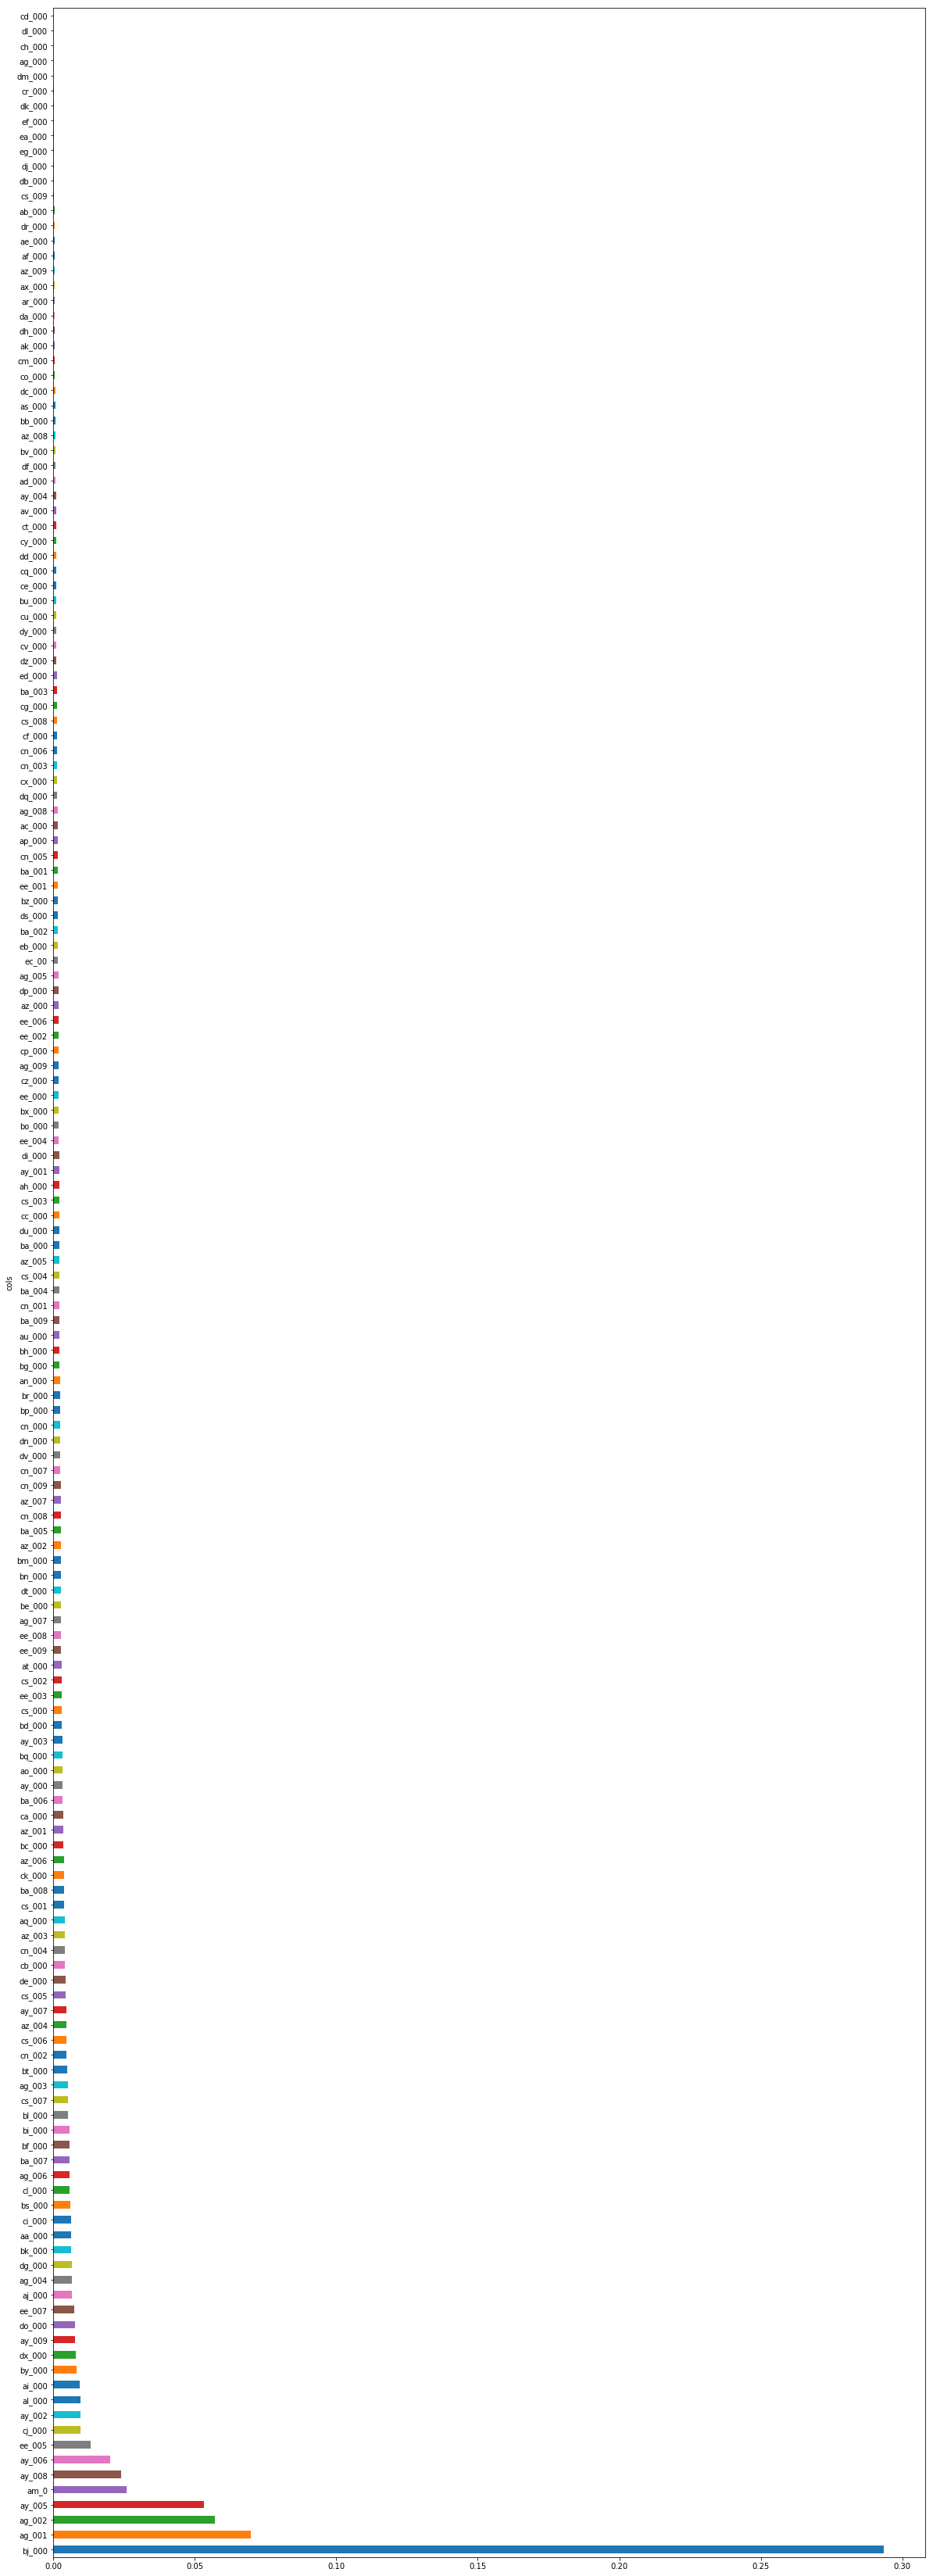

In [16]:
feat_importance.plot('cols', 'imp', 'barh', figsize=(20,60), legend=False);

In [17]:
sample = x_train.sample()
sample

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
48633,54354,0.713189,172.0,86.0,0.0,0.0,0.0,0.0,0.0,2790.0,275022.0,1775922.0,925792.0,113856.0,16956.0,0.0,1423546.0,0.0,0.0,0.0,1092.0,1868.0,2728942.0,2365724.0,665014.0,307828.0,4.0,0.0,0.0,0.0,44.0,552.0,0.0,0.0,0.0,0.0,0.0,6358.0,103912.0,997698.0,2002370.0,0.0,8140.0,5686.0,12502.0,34296.0,1043978.0,2005736.0,0.0,0.0,0.0,0.0,731118.0,1172442.0,613166.0,244348.0,119540.0,69844.0,53070.0,47342.0,23500.0,35968.0,3395720.0,1562.0,212.0,16014.0,0.0,1423546.0,39782.0,373472.0,288760.0,189940.0,304280.0,399603.167571,463710.833594,513147.820297,551389.799347,582871.32293,604886.613264,164800.0,54353.25,3395720.0,3395720.0,3447514.0,18260.0,6992.0,93400.0,970500.0,3110338.0,1209600.0,55474.0,42.0,112.0,0.0,2677305.6,0.0,428198.4,74.0,646.0,0.0,3046.0,37668.0,1110816.0,1329300.0,582782.0,38928.0,7000.0,798.0,0.0,56.0,60.0,3395720.0,37.06298,5172.0,498.0,230058.0,186952.0,1177340.0,1509128.0,1190.0,0.0,0.0,0.0,214.0,824.0,2644706.0,1223986.0,0.0,0.0,0.0,0.0,2698804.0,2234.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19098.0,9638.0,2244.0,3222654.0,515284.0,58730.0,13630.0,31940.0,19020.0,3286160.0,7710.0,0.0,0.0,14353270.0,1095.66,1296.0,443574.0,327960.0,177770.0,112068.0,252336.0,313314.0,721290.0,755034.0,6992.0,0.0,0.0,0.0


In [19]:
prediction, bias, contributions = treeinterpreter.predict(m, sample)
prediction[0], bias[0], y_train[sample.index[0]]

(0.0, 0.016605416666666668, 0)

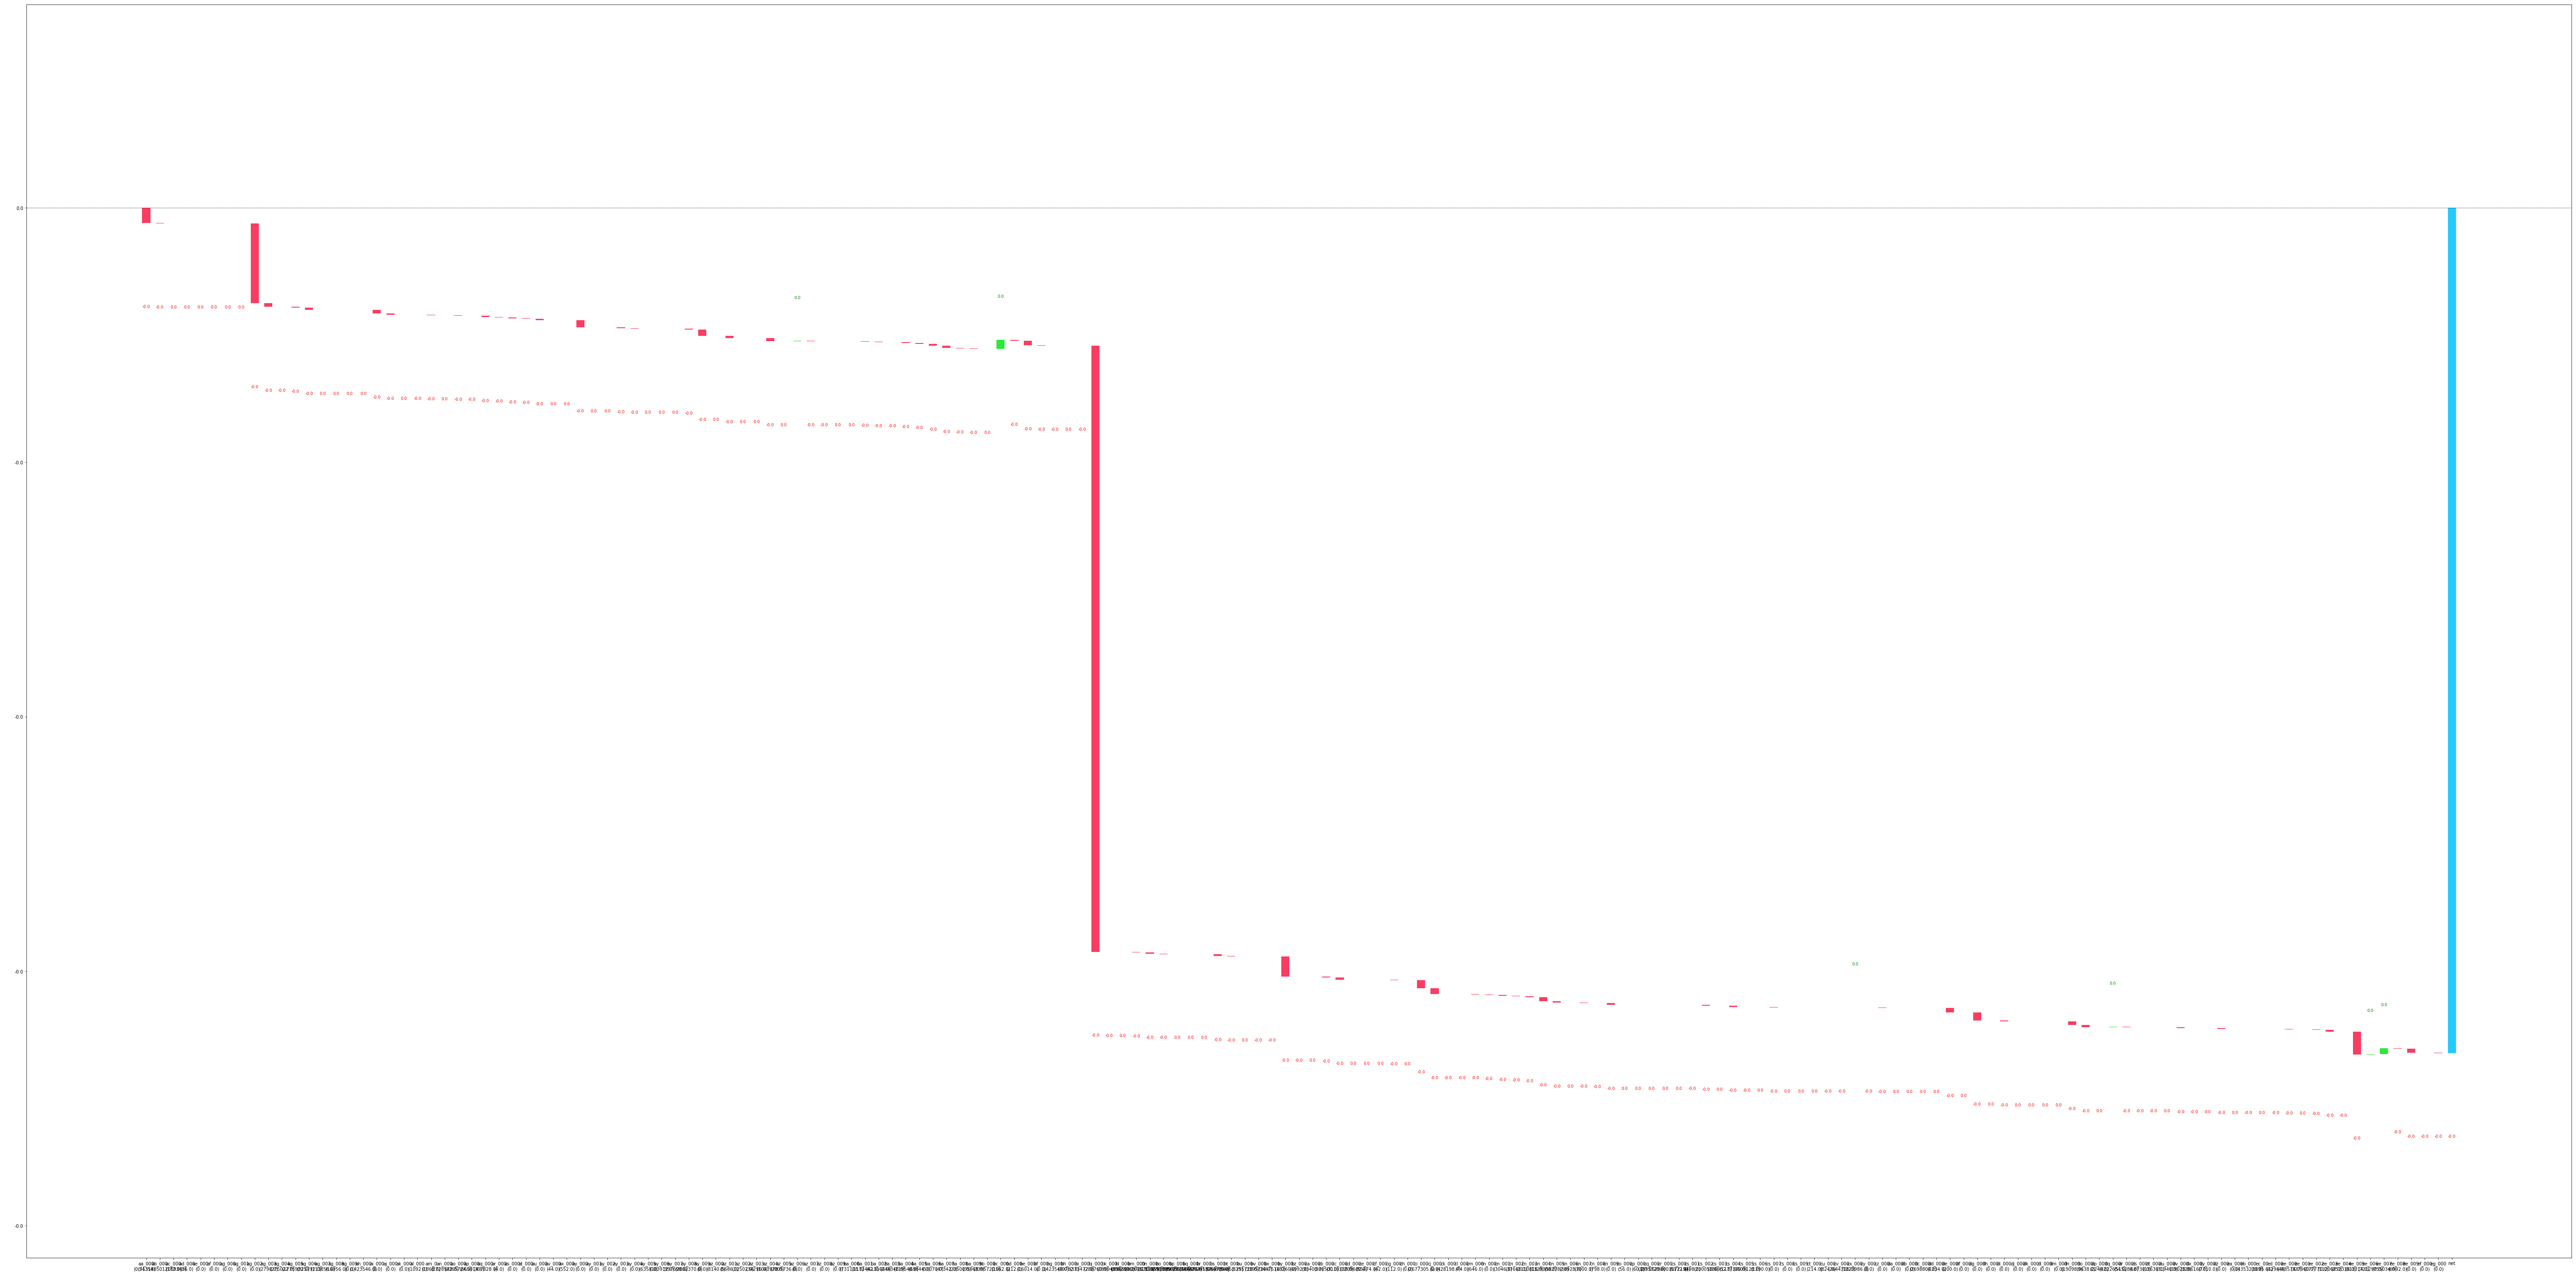

In [28]:
waterfallplot(sample, contributions[0], size=(80,40));